<a href="https://colab.research.google.com/github/melisaguler/hu-bby261-2020/blob/main/proje_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
%matplotlib inline


In [24]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical

In [25]:
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

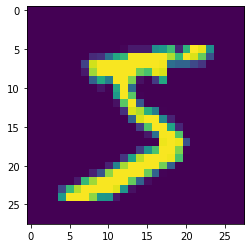

In [26]:
#plot the first image in the dataset
plt.imshow(X_train[0])

In [27]:
#check image shape
X_train[0].shape

(28, 28)

In [28]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [29]:
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [30]:
#create model
model = Sequential()

#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [31]:
#compile model using accuracy as a measure of model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [22]:
#train model
model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 170s 91ms/step - loss: 0.2154 - accuracy: 0.9522 - val_loss: 0.1111 - val_accuracy: 0.9653
Epoch 2/3
1875/1875 [==============================] - 170s 91ms/step - loss: 0.0682 - accuracy: 0.9788 - val_loss: 0.0864 - val_accuracy: 0.9750
Epoch 3/3
1875/1875 [==============================] - 176s 94ms/step - loss: 0.0502 - accuracy: 0.9846 - val_loss: 0.0902 - val_accuracy: 0.9752


In [32]:
#show predictions for the first 3 images in the test set
model.predict(X_test[:4])

array([[6.4433214e-28, 1.5915070e-16, 4.3938624e-13, 9.4250820e-18,
        4.1840424e-20, 3.4980388e-24, 9.9997914e-01, 1.9956514e-21,
        2.0874284e-05, 2.0838171e-23],
       [3.1741437e-18, 9.5393512e-18, 7.1038891e-15, 8.7700630e-10,
        9.9842811e-01, 2.9893519e-16, 1.3524486e-11, 1.5718904e-03,
        1.4239477e-17, 3.7155967e-10],
       [1.7554697e-13, 1.5606192e-11, 5.3279397e-08, 3.6175368e-07,
        9.9561584e-01, 6.6052146e-09, 4.2609279e-03, 1.8445663e-08,
        1.2276381e-04, 4.4500219e-08],
       [0.0000000e+00, 3.9176292e-19, 3.6295641e-19, 3.1595532e-24,
        6.4103260e-20, 1.8431959e-14, 7.8285877e-03, 2.2930055e-07,
        9.9217117e-01, 1.8793955e-14]], dtype=float32)

In [33]:
#show actual results for the first 3 images in the test set
y_test[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)